In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt

import sqlite3
import lstidFitDb

import lstid_ham # Compare with Mary Lou's Results
mlw = lstid_ham.LSTID_HAM()
df_mlw      = mlw.df.copy()
df_mlw      = df_mlw.set_index('date')
old_keys    = list(df_mlw.keys())
new_keys    = {x:'MLW_'+x for x in old_keys}
df_mlw      = df_mlw.rename(columns=new_keys)

%matplotlib inline

/Users/r01344106/code/lstid_detection_hamSpots/lstid_ham.py:82: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df  = pd.read_csv(data_in,comment='#',parse_dates=[0])


In [2]:
plt.rcParams['font.size']           = 16
plt.rcParams['font.weight']         = 'bold'
plt.rcParams['axes.titleweight']    = 'bold'
plt.rcParams['axes.labelweight']    = 'bold'
plt.rcParams['axes.xmargin']        = 0
#plt.rcParams['axes.grid']           = True
#plt.rcParams['grid.linestyle']      = ':'

In [3]:
ldb  = lstidFitDb.LSTIDFitDb()

sDate = datetime.datetime(2018,11,1)
eDate = datetime.datetime(2019,4,30)
dates = [sDate]
while dates[-1] < eDate:
    dates.append(dates[-1]+datetime.timedelta(days=1))

In [4]:
lst = []
inx = []
for date in dates:
    p0, in_DB = ldb.get_fit(date)
    if in_DB:
        lst.append(p0)
        inx.append(date)

df = pd.DataFrame(lst,index=inx)
df['dur_hr'] = (df['eTime'] - df['sTime']).apply(lambda x: x.total_seconds()/3600.)

# LSTIDs Only
tf = df['T_hr'] < 5
df = df[tf].copy()

In [5]:
df

,T_hr,amplitude_km,phase_hr,offset_km,slope_kmph,sTime,eTime,good_data,confirm_fit,dur_hr
2018-11-01,3.2,110.0,-0.4,1170.0,20.0,2018-11-01 16:41:00,2018-11-01 23:00:00,True,False,6.316667
2018-11-02,1.3,90.0,-3.0,1160.0,20.0,2018-11-02 14:53:00,2018-11-02 21:52:00,True,False,6.983333
2018-11-03,3.6,200.0,0.7,1250.0,0.0,2018-11-03 13:39:00,2018-11-03 20:18:00,True,False,6.650000
2018-11-04,3.0,200.0,0.5,1260.0,0.0,2018-11-04 17:09:00,2018-11-04 22:57:00,True,False,5.800000
2018-11-05,3.1,200.0,1.0,1210.0,0.0,2018-11-05 17:09:00,2018-11-05 22:30:00,True,False,5.350000
...,...,...,...,...,...,...,...,...,...,...
2019-04-21,3.4,90.0,0.7,910.0,40.0,2019-04-21 15:50:00,2019-04-21 21:34:00,True,False,5.733333
2019-04-24,3.2,100.0,1.3,1010.0,0.0,2019-04-24 15:20:00,2019-04-24 19:43:00,True,False,4.383333
2019-04-26,1.9,100.0,-1.8,680.0,70.0,2019-04-26 17:32:00,2019-04-26 20:51:00,True,False,3.316667
2019-04-28,3.0,90.0,0.0,1070.0,0.0,2019-04-28 17:04:00,2019-04-28 20:34:00,True,False,3.500000


In [6]:
keys = []
keys.append('T_hr')
keys.append('amplitude_km')
keys.append('dur_hr')

# keys.append('phase_hr')
# keys.append('offset_km')
# keys.append('slope_kmph')
# keys.append('sTime')
# keys.append('eTime')
# keys.append('good_data')
# keys.append('confirm_fit')

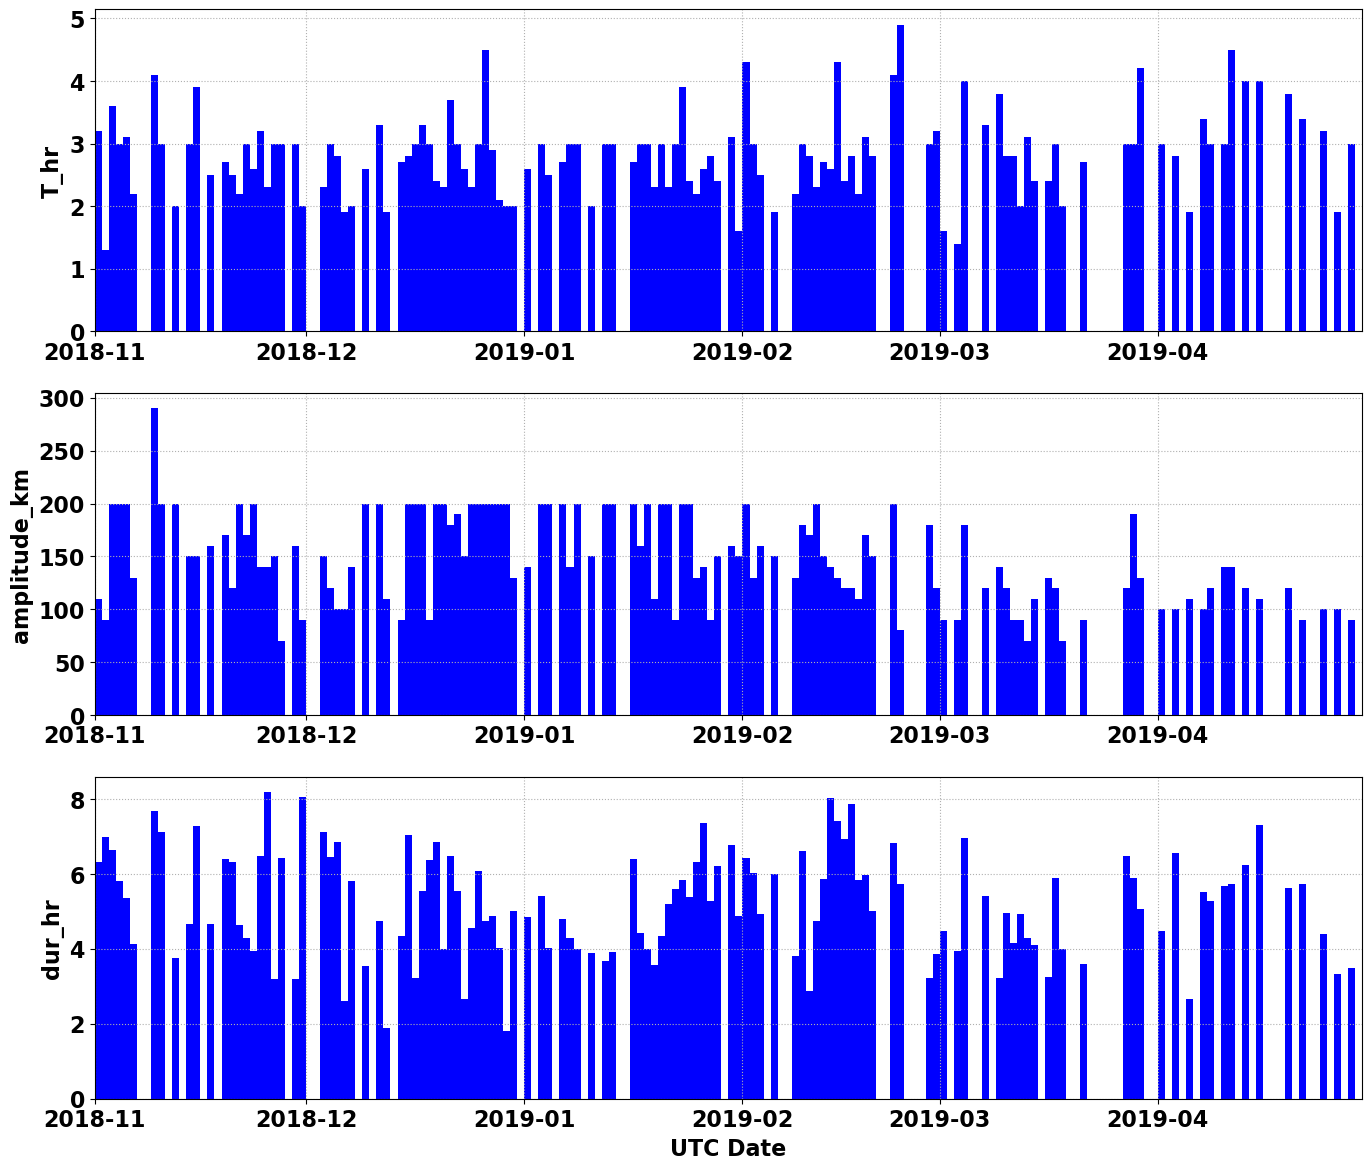

In [7]:
nrows = len(keys)
ncols = 1

fig = plt.figure(figsize=(14,nrows*4))
for ax_inx, key in enumerate(keys):
    ax = fig.add_subplot(nrows,ncols,ax_inx+1)
    xx      = df.index
    yy      = df[key]
    hndl    = ax.bar(xx,yy,width=1,color='blue',align='edge')
    ax.set_ylabel(key)
    ax.set_xlim(sDate,eDate)

    if ax_inx == nrows-1:
        ax.set_xlabel('UTC Date')

fig.tight_layout()

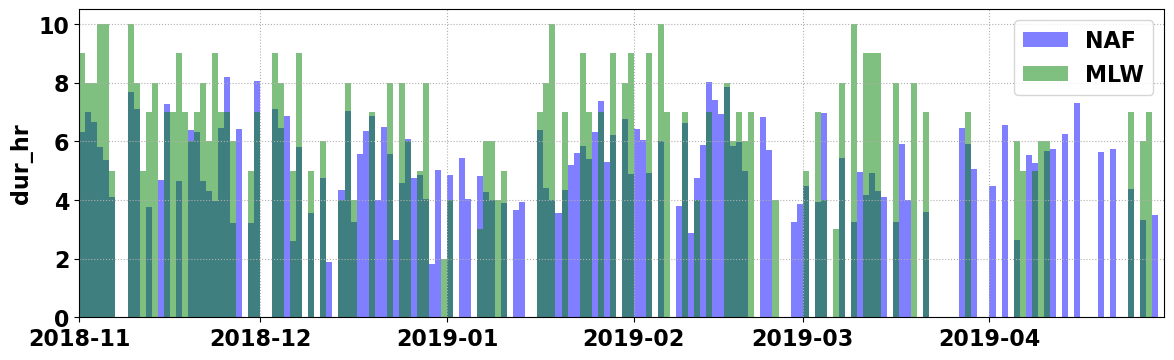

In [8]:
fig = plt.figure(figsize=(14,4))
ax  = fig.add_subplot(111)

key = 'dur_hr'
xx      = df.index
yy      = df[key]
hndl    = ax.bar(xx,yy,width=1,color='blue',align='edge',label='NAF',alpha=0.5)

xx      = mlw.df['date']
yy      = mlw.df['tid_hours']
hndl    = ax.bar(xx,yy,width=1,color='green',align='edge',alpha=0.5,label='MLW')

ax.set_ylabel(key)
ax.set_xlim(sDate,eDate)
ax.legend(loc='upper right')

In [9]:
mlw.df

,date,start_time,end_time,low_range_km,high_range_km,tid_hours,range_range,cycles,period_hr,comment
0,2018-11-01,14.0,23.0,1300.0,1500.0,9.0,200.0,3.0,3.0,NaN
1,2018-11-02,15.0,23.0,1200.0,1400.0,8.0,200.0,6.0,1.33,choppy
2,2018-11-03,13.0,21.0,1000.0,1400.0,8.0,400.0,3.0,2.67,NaN
3,2018-11-04,14.0,24.0,800.0,1500.0,10.0,700.0,4.0,2.5,
4,2018-11-05,13.0,23.0,800.0,1400.0,10.0,600.0,5.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...
176,2019-04-26,15.0,21.0,1000.0,1200.0,6.0,200.0,6.0,1.0,m
177,2019-04-27,15.0,22.0,1100.0,1300.0,7.0,200.0,8.0,0.88,choppy
178,2019-04-28,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,flat
179,2019-04-29,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,curve


In [10]:
df.to_csv('NAF_LSTID_fits.csv')

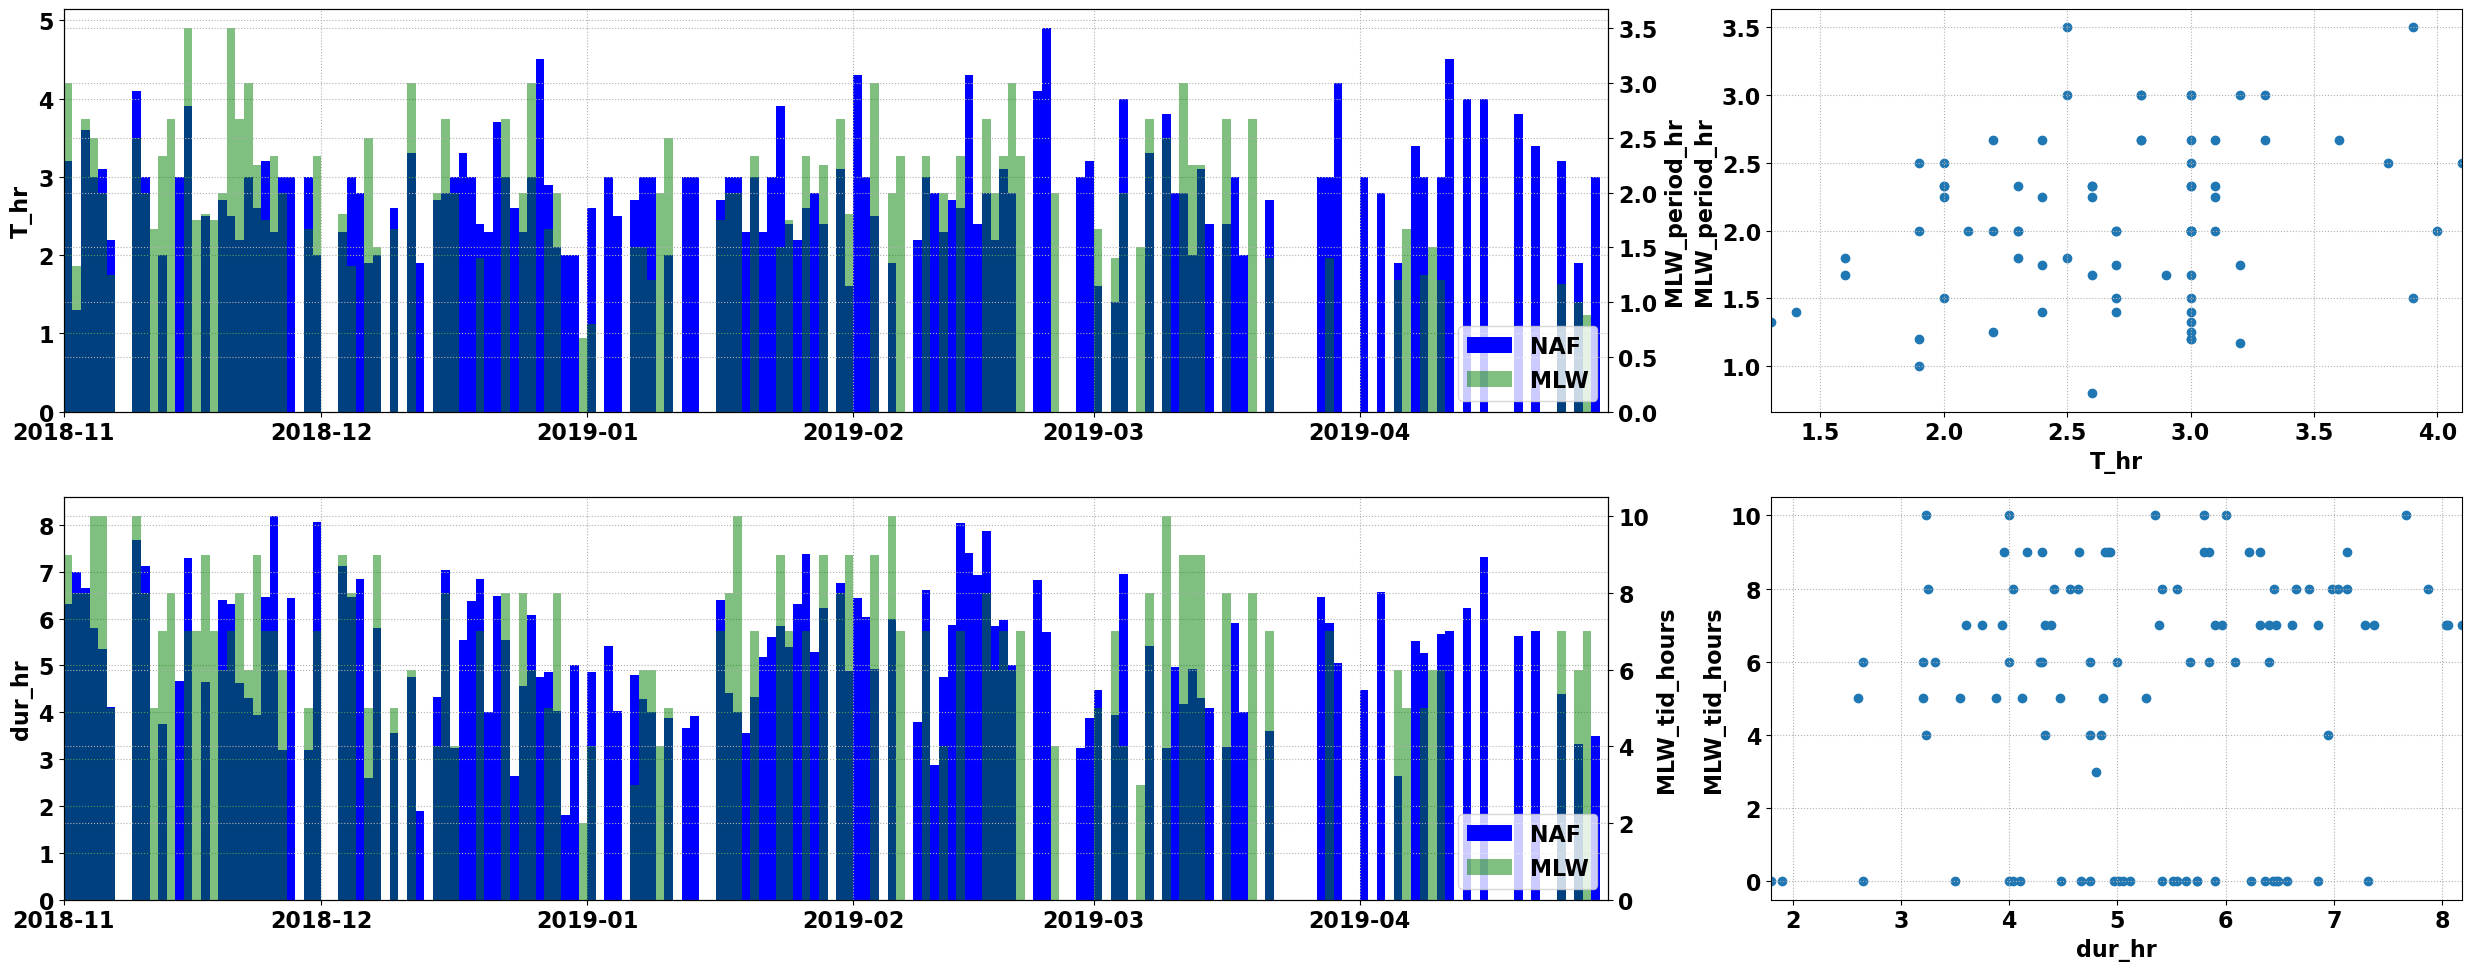

In [11]:
# Compare parameters - List of (df, lstid_mlw) keys to compare.
dfc = pd.concat([df,df_mlw],axis=1)

cmps = []
cmps.append( ('T_hr',   'MLW_period_hr') )
cmps.append( ('dur_hr',  'MLW_tid_hours') )

nCols   = 3
nRows   = len(cmps)

axInx   = 0
figsize = (25,nRows*5)

gs      = mpl.gridspec.GridSpec(nrows=nRows,ncols=nCols)
fig     = plt.figure(figsize=figsize)
for pinx,(key_0,key_1) in enumerate(cmps):
    rinx    = pinx
    ax0     = fig.add_subplot(gs[rinx,:2])

    p0  = dfc[key_0]
    p1  = dfc[key_1]

    hndls   = []
    hndl    = ax0.bar(p0.index,p0,width=1,color='blue',align='edge',label='NAF')
    hndls.append(hndl)
    ax0.set_ylabel(key_0)
    ax0.set_xlim(sDate,eDate)

    ax0r    = ax0.twinx()
    hndl    = ax0r.bar(p1.index,p1,width=1,color='green',align='edge',label='MLW',alpha=0.5)
    hndls.append(hndl)
    ax0r.set_ylabel(key_1)

    ax0r.legend(handles=hndls,loc='lower right')

    ax1   = fig.add_subplot(gs[rinx,2])
    ax1.scatter(p0,p1)
    ax1.set_xlabel(key_0)
    ax1.set_ylabel(key_1)

fig.tight_layout()